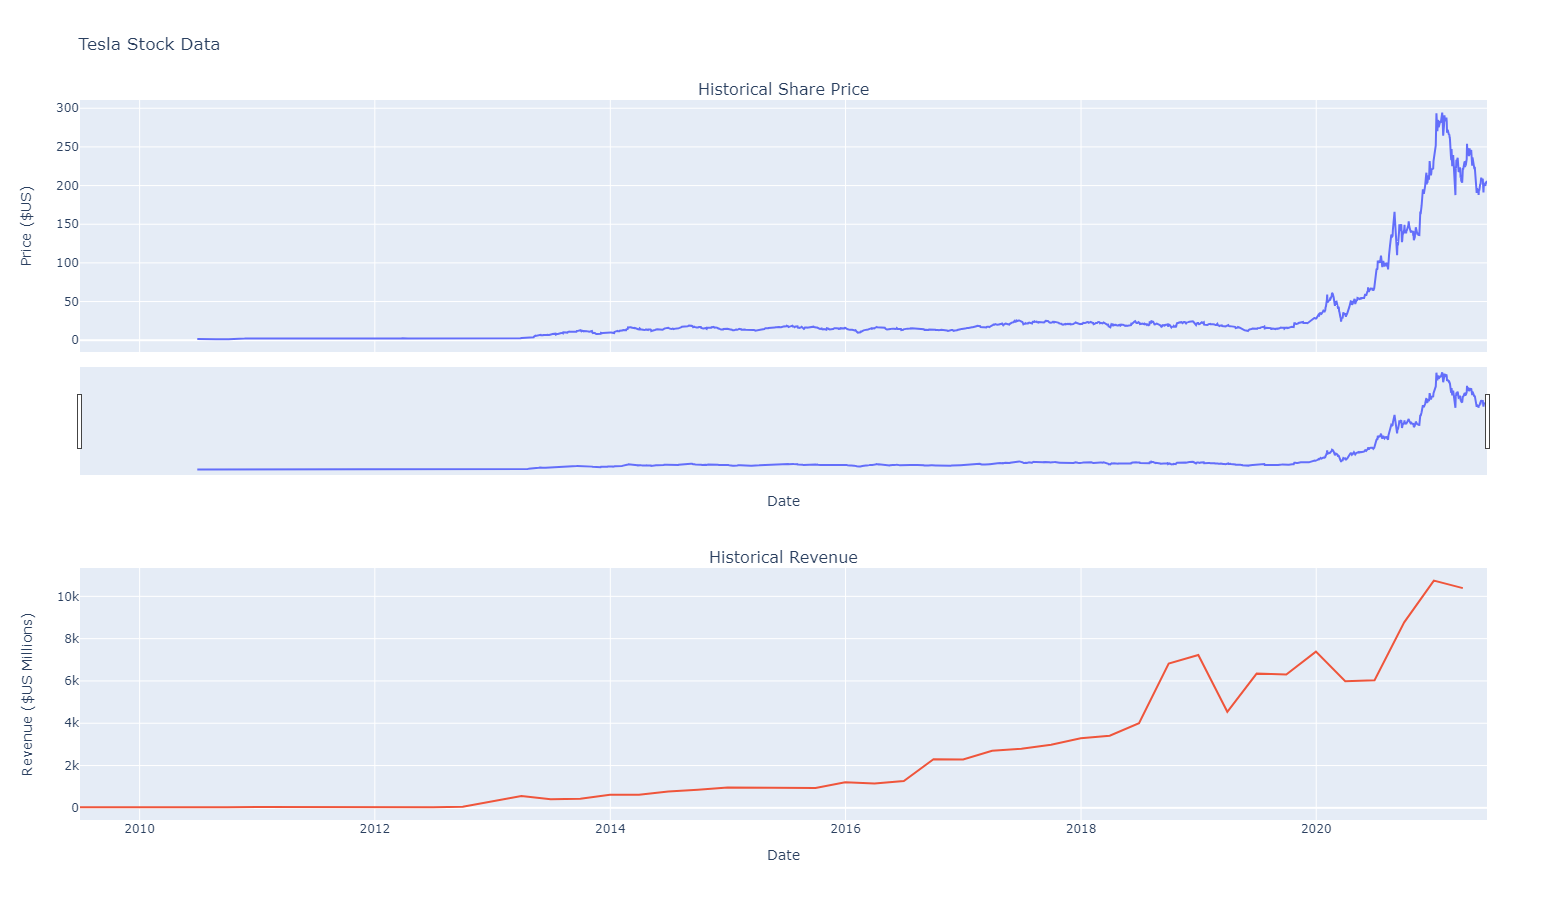

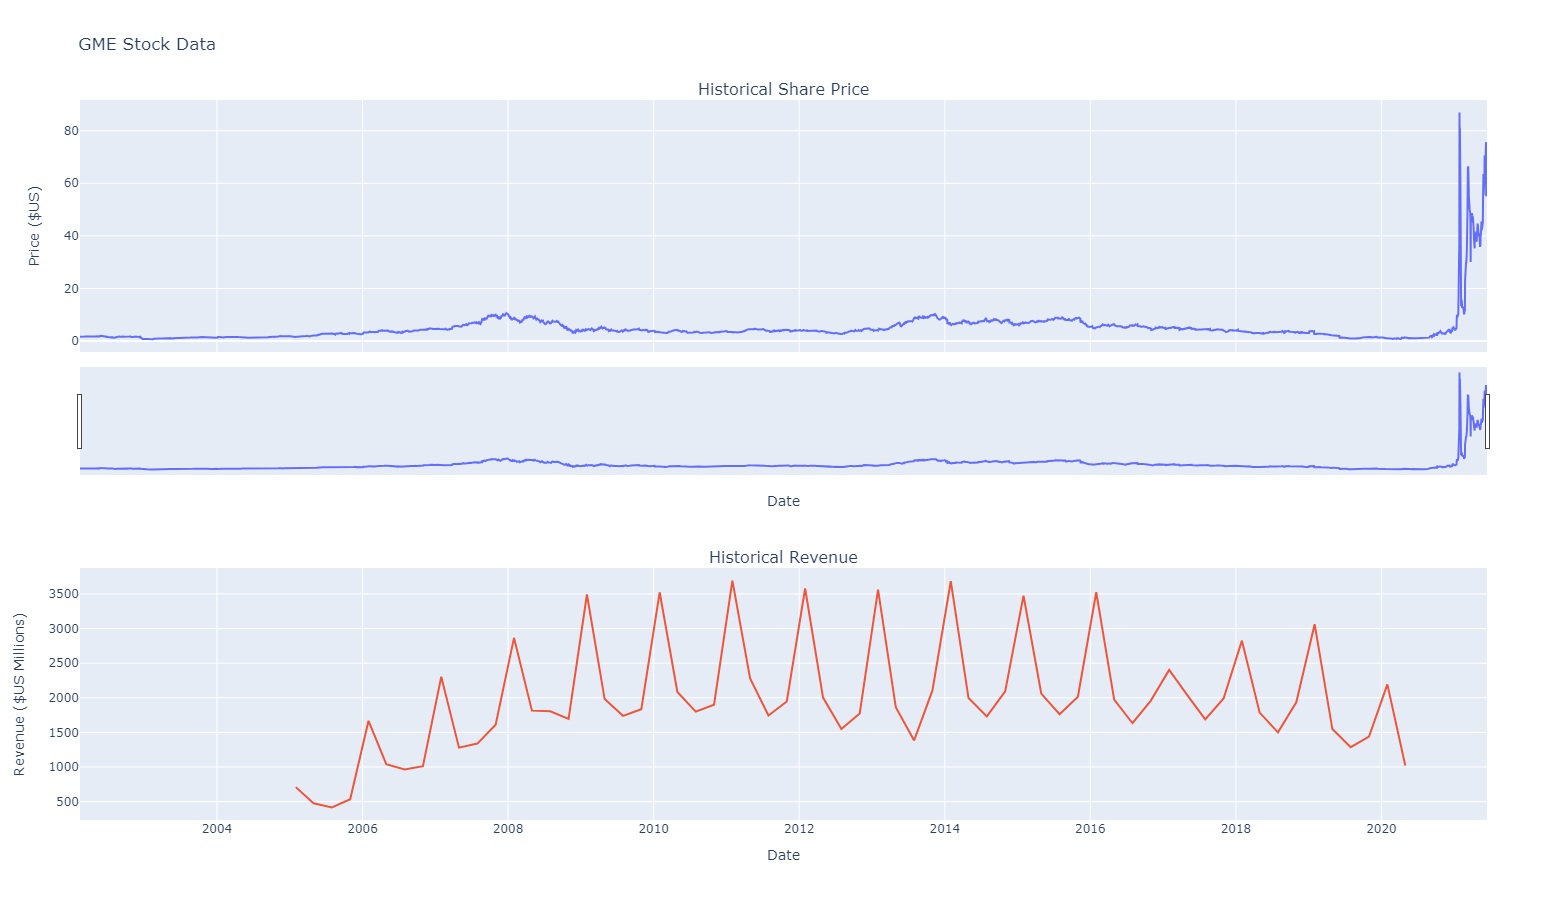

In [13]:
#!pip install yfinance==0.1.67
#!mamba install bs4==4.10.0 -y
#!pip install nbformat==4.2.0

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

tesla = yf.Ticker("TSLA") #Using Ticker function to extract data on to create a ticker object
tesla_data = tesla.history(period="max") #use history to extract stock information
tesla_data.reset_index(inplace=True)
tesla_data.head()

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data,'html.parser')
tables = soup.find_all("table")

for index,table in enumerate(tables):
   if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in tables[table_index].find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)    

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

gme = yf.Ticker("GME") #Using Ticker function to extract data on to create a ticker object
gme_data = gme.history(period="max") #use history to extract stock information
gme_data.reset_index(inplace=True)
gme_data.head()

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html" 
html_data = requests.get(url).text
soup1 = BeautifulSoup(html_data,'html.parser')
tables1 = soup1.find_all("table")

for index,table in enumerate(tables1):
   if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
gme_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in tables1[table_index].find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)    

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data')
make_graph(gme_data, gme_revenue, 'GME Stock Data')